<a href="https://colab.research.google.com/github/abhiWriteCode/Tutorial-for-spaCy/blob/master/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# spaCy

spaCy is a free, open-source library for advanced Natural
Language Processing (NLP) in Python. It's designed
specifically for production use and helps you build
applications that process and "understand" large volumes
of text. **Documentation**: [spacy.io](spacy.io)

### Install and import

In [1]:
# To install
!pip install spacy -q

# imports
import spacy

    100% |████████████████████████████████| 17.3MB 2.0MB/s 
featuretools 0.4.1 has requirement pandas>=0.23.0, but you'll have pandas 0.22.0 which is incompatible.
datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.8 which is incompatible.


## Statistical models

### Download statistical models

Predict part-of-speech tags, dependency labels, named
entities and more. See here for available models:
[spacy.io/models](spacy.io/models)

In [2]:
!python -m spacy download en_core_web_sm


    Linking successful
    /usr/local/lib/python3.6/dist-packages/en_core_web_sm -->
    /usr/local/lib/python3.6/dist-packages/spacy/data/en_core_web_sm

    You can now load the model via spacy.load('en_core_web_sm')



### Check that your installed models are up to date

In [3]:
!python -m spacy validate


    Installed models (spaCy v2.0.18)
    /usr/local/lib/python3.6/dist-packages/spacy

    TYPE        NAME                  MODEL                 VERSION                                   
    package     en-core-web-sm        en_core_web_sm        2.0.0    ✔      
    link        en                    en_core_web_sm        2.0.0    ✔      
    link        en_core_web_sm        en_core_web_sm        2.0.0    ✔      


### Loading statistical models

In [0]:
import spacy

# Load the installed model "en_core_web_sm"
nlp = spacy.load("en_core_web_sm")

## Documents and tokens

### Processing text

Processing text with the nlp object returns a Doc object
that holds all information about the tokens, their linguistic
features and their relationships

### Accessing token attributes

In [5]:
doc = nlp("This is a text")

# Token texts
[token.text for token in doc]

['This', 'is', 'a', 'text']

## Spans

### Accessing spans

Span indices are **exclusive**. So `doc[2:4]` is a span starting at
token 2, up to – but not including! – token 4.

In [6]:
doc = nlp("This is a text")
span = doc[2:4]
span.text

'a text'

## Linguistic features

Attributes return label IDs. For string labels, use the
attributes with an underscore. For example, `token.pos_` .

### Part-of-speech tags 

*PREDICTED BY STATISTICAL MODEL*

In [9]:
doc = nlp("This is a text.")

# Coarse-grained part-of-speech tags
print([token.pos_ for token in doc])

# Fine-grained part-of-speech tags
print([token.tag_ for token in doc])

['DET', 'VERB', 'DET', 'NOUN', 'PUNCT']
['DT', 'VBZ', 'DT', 'NN', '.']


### Syntactic dependencies

*PREDICTED BY STATISTICAL MODEL*

In [11]:
doc = nlp("This is a text.")

# Dependency labels
print([token.dep_ for token in doc])

# Syntactic head token (governor)
print([token.head.text for token in doc])

['nsubj', 'ROOT', 'det', 'attr', 'punct']
['is', 'is', 'text', 'is', 'is']


### Named entities

*PREDICTED BY STATISTICAL MODEL*

In [12]:
doc = nlp("Larry Page founded Google")

# Text and label of named entity span
print([(ent.text, ent.label_) for ent in doc.ents])

[('Larry Page', 'PERSON'), ('Google', 'ORG')]


## Syntax iterators

### Sentences 

*USUALLY NEEDS THE DEPENDENCY PARSER*

In [13]:
doc = nlp("This a sentence. This is another one.")
# doc.sents is a generator that yields sentence spans
print([sent.text for sent in doc.sents])

['This a sentence.', 'This is another one.']


### Base noun phrases 
*NEEDS THE TAGGER AND PARSER*

In [14]:
doc = nlp("I have a red car")

# doc.noun_chunks is a generator that yields spans
print([chunk.text for chunk in doc.noun_chunks])

['I', 'a red car']


## Label explanations

In [15]:
print(spacy.explain("RB"))

print(spacy.explain("GPE"))

adverb
Countries, cities, states


## Visualizing

If you're in a Jupyter notebook, use displacy.render .
Otherwise, use displacy.serve to start a web server and
show the visualization in your browser.

In [0]:
from IPython.display import display, SVG

In [0]:
from spacy import displacy

### Visualize dependencies

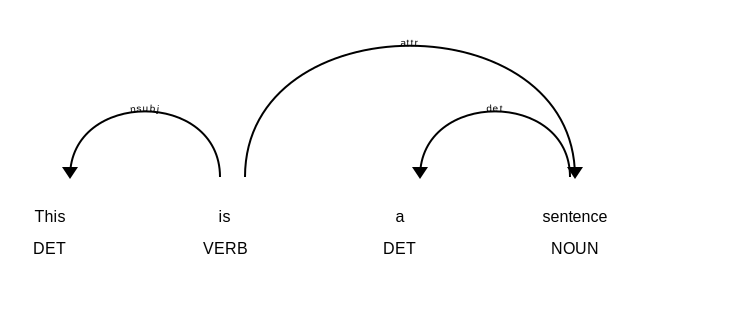

In [26]:
doc = nlp("This is a sentence")
diagram = displacy.render(doc, style="dep")

display(SVG(diagram))

### Visualize named entities

In [27]:
doc = nlp("Larry Page founded Google")
diagram = displacy.render(doc, style="ent")

display(SVG(diagram))

## Word vectors and similarity

To use word vectors, you need to install the larger models
ending in `md` or `lg` , for example `en_core_web_lg` .

### Comparing similarity

In [28]:
doc1 = nlp("I like cats")
doc2 = nlp("I like dogs")

# Compare 2 documents
print(doc1.similarity(doc2))

# Compare 2 tokens
print(doc1[2].similarity(doc2[2]))

# Compare tokens and spans
print(doc1[0].similarity(doc2[1:3]))

0.9133257426978459
0.7518883
0.19759766442466106


### Accessing word vectors

In [30]:
# Vector as a numpy array
doc = nlp("I like cats")

print(doc[2].vector.shape)
# The L2 norm of the token's vector
print(doc[2].vector_norm)

(384,)
24.809391


## Pipeline components

Functions that take a `Doc` object, modify it and return it.

`Text` -->  | `tokenizer`,  `tagger`,  `parser`,  `ner`, ... | --> `Doc`


### Pipeline information

In [32]:
nlp = spacy.load("en_core_web_sm")
print(nlp.pipe_names)

print(nlp.pipeline)

['tagger', 'parser', 'ner']
[('tagger', <spacy.pipeline.Tagger object at 0x7f7972874ef0>), ('parser', <spacy.pipeline.DependencyParser object at 0x7f79728cb150>), ('ner', <spacy.pipeline.EntityRecognizer object at 0x7f797282c4c0>)]


### Custom components

In [0]:
# Function that modifies the doc and returns it
def custom_component(doc):
    print("Do something to the doc here!")
    return doc

# Add the component first in the pipeline
nlp.add_pipe(custom_component, first=True)

Components can be added `first` , `last` (default), or
 `before` or `after` an existing component.

## Extension attributes

Custom attributes that are registered on the global `Doc` , `Token` and `Span` classes and become available as `.[link text](https://)_`

In [0]:
import os
os._exit(00)

In [0]:
from spacy.tokens import Doc, Token, Span
import spacy
nlp = spacy.load("en_core_web_sm")

doc = nlp("The sky over New York is blue")

### Attribute extensions 
*WITH DEFAULT VALUE*

In [0]:
# Register custom attribute on Token class
Token.set_extension("is_color", default=False)

# Overwrite extension attribute with default value
doc[6]._.is_color = True 

### Property extensions 
*WITH GETTER & SETTER*

In [3]:
# Register custom attribute on Doc class
get_reversed = lambda doc: doc.text[::-1]
Doc.set_extension("reversed", getter=get_reversed)

# Compute value of extension attribute with getter
doc._.reversed

'eulb si kroY weN revo yks ehT'

### Method extensions 
*CALLABLE METHOD*

In [5]:
# Register custom attribute on Span class
has_label = lambda span, label: span.label_ == label
Span.set_extension("has_label", method=has_label)

# Compute value of extension attribute with method
doc[3:5]._.has_label("GPE")

False

## Rule-based matching

### Using the matcher

In [6]:
# Matcher is initialized with the shared vocab
from spacy.matcher import Matcher

# Each dict represents one token and its attributes
matcher = Matcher(nlp.vocab)

# Add with ID, optional callback and pattern(s)
pattern = [{"LOWER": "new"}, {"LOWER": "york"}]
matcher.add("CITIES", None, pattern)

# Match by calling the matcher on a Doc object
doc = nlp("I live in New York")
matches = matcher(doc)

# Matches are (match_id, start, end) tuples
for match_id, start, end in matches:
    # Get the matched span by slicing the Doc
    
    span = doc[start:end]
    print(span.text)

New York


## Rule-based matching

### Token patterns

In [0]:
# "love cats", "loving cats", "loved cats"
pattern1 = [{"LEMMA": "love"}, {"LOWER": "cats"}]

# "10 people", "twenty people"
pattern2 = [{"LIKE_NUM": True}, {"TEXT": "people"}]

# "book", "a cat", "the sea" (noun + optional article)
pattern3 = [{"POS": "DET", "OP": "?"}, {"POS": "NOUN"}]

### Operators and quantifiers

Can be added to a token dict as the `"OP"` key

* `!` Negate pattern and match **exactly 0 times**.

* `?` Make pattern optional and match **0 or 1 times**.

* `+` Require pattern to match **1 or more times**.

* `*` Allow pattern to match **0 or more times**. 

## Glossary


|   |   |
|---|---|
| Tokenization  |  Segmenting text into words, punctuation etc |
| Lemmatization  | Assigning the base forms of words, for example:"was" → "be" or "rats" → "rat". |
|  Sentence Boundary Detection |  Finding and segmenting individual sentences |
| Part-of-speech (POS) Tagging  | Assigning word types to tokens like verb or noun  |
|  Dependency Parsing | Assigning syntactic dependency labels describing the relations between individual tokens, like subject or object.  |
| Named Entity Recognition (NER)  | Labeling named "real-world" objects, like persons, companies or locations.  |
| Text Classification  | Assigning categories or labels to a whole document, or parts of a document.  |
| Statistical model  |  Process for making predictions based on examples |
| Training  |  Updating a statistical model with new examples. |